REGALA_Visualization: Matplotlib Part 1


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
machine=pd.read_csv('/Users/ASUS TUF/Downloads/engineering_sensor_data.csv')
machine

,Sensor_ID,Temperature_C,Pressure_psi,Vibration_mm_s,RPM,Status,Timestamp
0,S4,74.55,182.93,2.75,4577,Warning,2025-01-01 00:00:00
1,S5,77.17,199.71,2.40,3901,OK,2025-01-01 01:00:00
2,S3,80.12,204.04,2.40,2387,OK,2025-01-01 02:00:00
3,S5,80.43,183.91,1.36,2303,OK,2025-01-01 03:00:00
4,S5,75.28,171.19,2.90,1592,Warning,2025-01-01 04:00:00
...,...,...,...,...,...,...,...
195,S3,66.57,177.28,3.01,1249,Warning,2025-01-09 03:00:00
196,S3,78.92,204.52,2.19,1390,Warning,2025-01-09 04:00:00
197,S1,73.75,216.79,3.13,4853,OK,2025-01-09 05:00:00
198,S5,73.00,199.78,2.32,1334,OK,2025-01-09 06:00:00


In [4]:
machine.head()

,Sensor_ID,Temperature_C,Pressure_psi,Vibration_mm_s,RPM,Status,Timestamp
0,S4,74.55,182.93,2.75,4577,Warning,2025-01-01 00:00:00
1,S5,77.17,199.71,2.40,3901,OK,2025-01-01 01:00:00
2,S3,80.12,204.04,2.40,2387,OK,2025-01-01 02:00:00
3,S5,80.43,183.91,1.36,2303,OK,2025-01-01 03:00:00
4,S5,75.28,171.19,2.90,1592,Warning,2025-01-01 04:00:00


In [18]:
machine['Timestamp']=pd.to_datetime(machine['Timestamp'])
machine['Month']=machine['Timestamp'].dt.month_name()
machine['Month_num']=machine['Timestamp'].dt.month


In [19]:
mean_temp=machine.groupby('Timestamp')['Temperature_C'].mean().reset_index()
mean_temp

,Timestamp,Temperature_C
0,2025-01-01 00:00:00,74.55
1,2025-01-01 01:00:00,77.17
2,2025-01-01 02:00:00,80.12
3,2025-01-01 03:00:00,80.43
4,2025-01-01 04:00:00,75.28
...,...,...
195,2025-01-09 03:00:00,66.57
196,2025-01-09 04:00:00,78.92
197,2025-01-09 05:00:00,73.75
198,2025-01-09 06:00:00,73.00


LINE

Text(0, 0.5, 'Temperature')

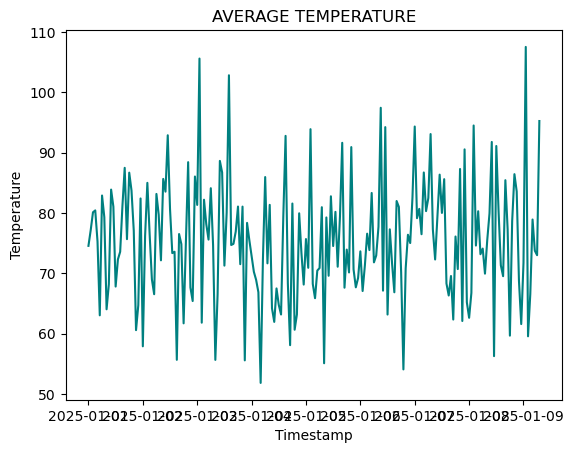

In [20]:
mean_temp=mean_temp.sort_values(by='Timestamp')
plt.plot(mean_temp['Timestamp'],mean_temp['Temperature_C'],color='teal')
plt.title('AVERAGE TEMPERATURE')
plt.xlabel('Timestamp')
plt.ylabel('Temperature')

SCATTER

In [31]:
status_colors = {'OK': 'green', 'Warning': 'orange', 'Failure': 'red'}
colors = machine['Status'].map(status_colors)

Text(0, 0.5, 'Vibration_mm_s')

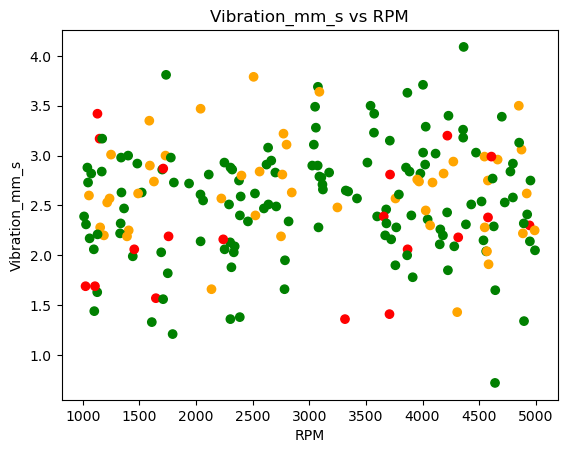

In [37]:
plt.scatter(machine['RPM'],machine['Vibration_mm_s'],color=colors)
plt.title('Vibration_mm_s vs RPM')
plt.xlabel('RPM')
plt.ylabel('Vibration_mm_s')

BAR

In [ ]:
mean_psi=machine.groupby('Sensor_ID')['Pressure_psi'].mean().reset_index()
mean_psi




Text(0.5, 1.0, 'AVG PRESSURE OF SENSOR_ID')

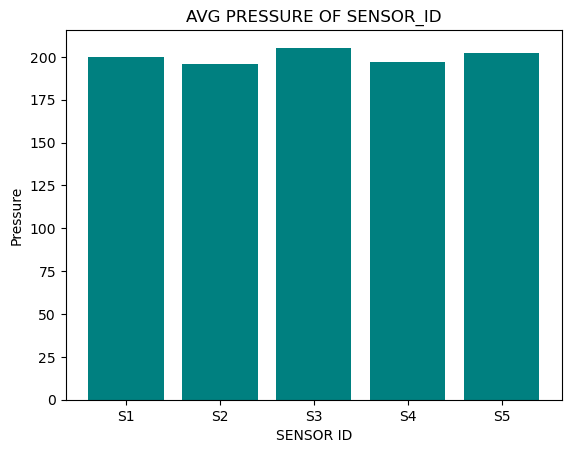

In [71]:
plt.bar(mean_psi['Sensor_ID'],mean_psi['Pressure_psi'],color='teal')
plt.xlabel('SENSOR ID')
plt.ylabel('Pressure')
plt.title('AVG PRESSURE OF SENSOR_ID')


BARH

In [ ]:
failure_data = machine[machine['Status'] == 'Failure']
failure_counts = failure_data['Sensor_ID'].value_counts().reset_index()
failure_counts.columns = ['Sensor_ID', 'Failure Count']
failure_counts = failure_counts.sort_values(by='Failure Count', ascending=False)


Text(0.5, 1.0, 'Number of Failures per Sensor')

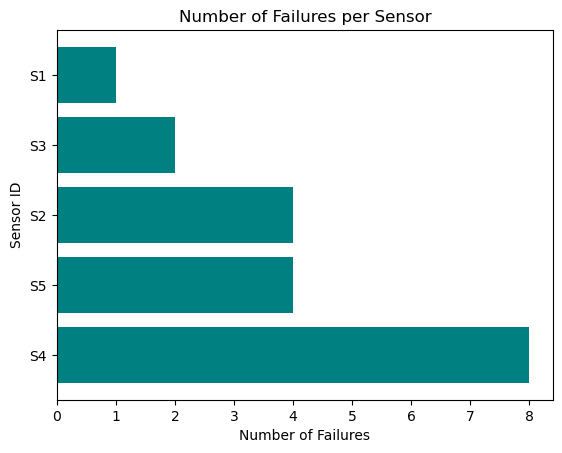

In [61]:
plt.barh(failure_counts['Sensor_ID'], failure_counts['Failure Count'], color='teal')
plt.xlabel('Number of Failures')
plt.ylabel('Sensor ID')
plt.title('Number of Failures per Sensor')

PIE

([<matplotlib.patches.Wedge at 0x1195fee1670>,
 [Text(-0.9468162003458402, -0.5599456069679142, 'OK'),
  Text(1.0696068859907926, 0.2567900103997033, 'Warning'),
  Text(0.3234442553814899, 1.051372347772526, 'Failure')],
 [Text(-0.51644520018864, -0.3054248765279532, '67.0%'),
  Text(0.5834219378131595, 0.14006727839983812, '23.5%'),
  Text(0.17642413929899448, 0.5734758260577415, '9.5%')])

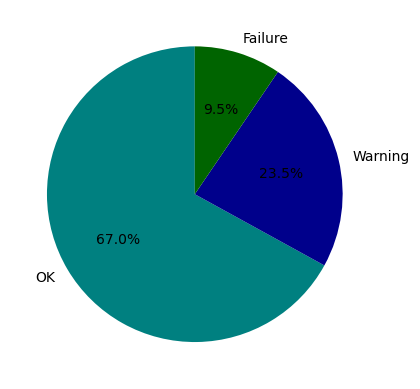

In [68]:
status = machine['Status'].value_counts()
plt.pie(status, labels=status.index, autopct='%1.1f%%', startangle=90, colors=['Teal', 'darkblue', 'Darkgreen'])




In [72]:
plt.savefig('/Users/ASUS TUF/Downloads/REGALA_Visualization.png')

<Figure size 640x480 with 0 Axes>